# RAPPORT Machine Learning 2025 
**Salmi Adam**

**Salzenstein Gaspar**

## Clustering

Le Clustering est une méthode d'apprentissage non-supervisée qui consiste au regroupement de données non labélisées en comparant leurs similarités/différences.

### K-Means

La méthode des K-Means est une façon (la plus logique du point de vue humain) de faire du Clustering. Cette méthode regroupe des "pôles" de points en essayant, par itération successive de minimiser la variance intra-cluster. Toutefois, cela suppose d'une part de connaître à l'avance le nombre de cluster et d'autre part les "pôles" doivent nécessairement être sphériques, ce qui limite beaucoup le type de données qui peut être utilisé avec cette méthode.

Appel K-Means pour plusieurs valeurs de k, sans soucis
nb clusters =  2 , 
	 sil_score =  0.6305972114000131 , 
	 davies_score =  0.5418013301909271 , 
	 cal_score =  2386.4259543247335  , 
	 nb iter =  3  , 
	 runtime =  37.46  ms 
nb clusters =  3 , 
	 sil_score =  0.4701886484665538 , 
	 davies_score =  0.9521144832659688 , 
	 cal_score =  1581.2113709883952  , 
	 nb iter =  7  , 
	 runtime =  1.85  ms 
nb clusters =  4 , 
	 sil_score =  0.43487581442250783 , 
	 davies_score =  1.1457102353034427 , 
	 cal_score =  1444.574330416273  , 
	 nb iter =  6  , 
	 runtime =  2.14  ms 
nb clusters =  5 , 
	 sil_score =  0.37329279574716395 , 
	 davies_score =  0.9884279500138863 , 
	 cal_score =  1402.9006614714917  , 
	 nb iter =  6  , 
	 runtime =  1.29  ms 
nb clusters =  6 , 
	 sil_score =  0.38172541858599246 , 
	 davies_score =  0.8351957102366064 , 
	 cal_score =  1481.6287159174217  , 
	 nb iter =  23  , 
	 runtime =  3.49  ms 
nb clusters =  7 , 
	 sil_score =  0.3898305350574121 , 

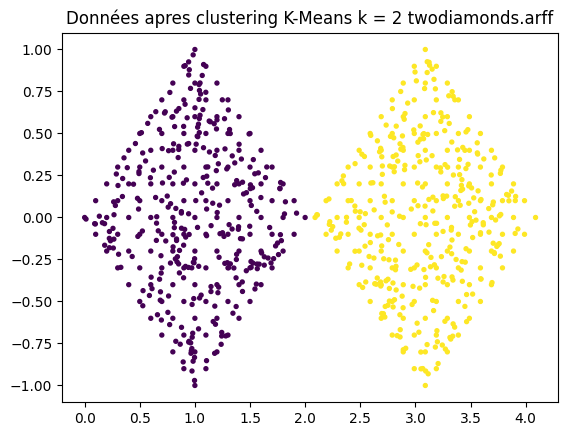

nb clusters =  2 , 
	 sil_score =  0.47418143741570656 , 
	 davies_score =  0.7808831254303358 , 
	 cal_score =  515.5041617551458  , 
	 nb iter =  5  , 
	 runtime =  3.13  ms 
nb clusters =  3 , 
	 sil_score =  0.6171807766046922 , 
	 davies_score =  0.5159747512886118 , 
	 cal_score =  1204.3195506314394  , 
	 nb iter =  4  , 
	 runtime =  1.25  ms 
nb clusters =  4 , 
	 sil_score =  0.5349030089406274 , 
	 davies_score =  0.6705635171944191 , 
	 cal_score =  1035.7519615128006  , 
	 nb iter =  7  , 
	 runtime =  1.26  ms 
nb clusters =  5 , 
	 sil_score =  0.4465450534040619 , 
	 davies_score =  0.8646489720316237 , 
	 cal_score =  944.9637719975888  , 
	 nb iter =  6  , 
	 runtime =  1.06  ms 
nb clusters =  6 , 
	 sil_score =  0.40444824013326514 , 
	 davies_score =  0.8300402461629014 , 
	 cal_score =  966.920951857427  , 
	 nb iter =  8  , 
	 runtime =  1.65  ms 
nb clusters =  7 , 
	 sil_score =  0.42328006798777484 , 
	 davies_score =  0.8624236271417018 , 
	 cal_score =  1001

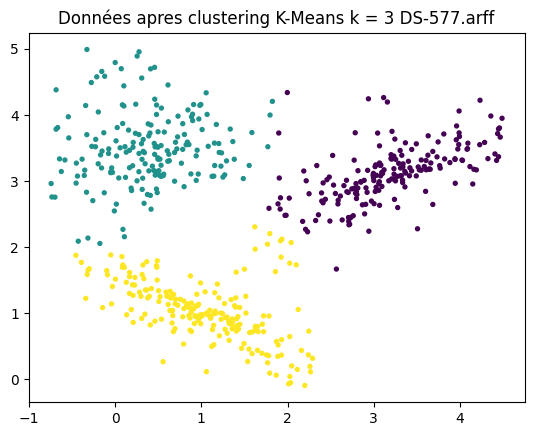

nb clusters =  2 , 
	 sil_score =  0.4312322443769002 , 
	 davies_score =  1.095247783773391 , 
	 cal_score =  765.8994158732044  , 
	 nb iter =  4  , 
	 runtime =  1.57  ms 
nb clusters =  3 , 
	 sil_score =  0.45782019619970665 , 
	 davies_score =  0.7565090997957817 , 
	 cal_score =  933.992240129057  , 
	 nb iter =  10  , 
	 runtime =  2.47  ms 
nb clusters =  4 , 
	 sil_score =  0.5973265109573306 , 
	 davies_score =  0.5168282516187686 , 
	 cal_score =  2075.6965259576164  , 
	 nb iter =  3  , 
	 runtime =  1.39  ms 
nb clusters =  5 , 
	 sil_score =  0.51632666065432 , 
	 davies_score =  0.7665485057433681 , 
	 cal_score =  1749.0026521762727  , 
	 nb iter =  15  , 
	 runtime =  2.9  ms 
nb clusters =  6 , 
	 sil_score =  0.4365053774791773 , 
	 davies_score =  0.9308178831708375 , 
	 cal_score =  1556.8916166066294  , 
	 nb iter =  7  , 
	 runtime =  2.0  ms 
nb clusters =  7 , 
	 sil_score =  0.3855772704185144 , 
	 davies_score =  1.0590581188176802 , 
	 cal_score =  1506.383

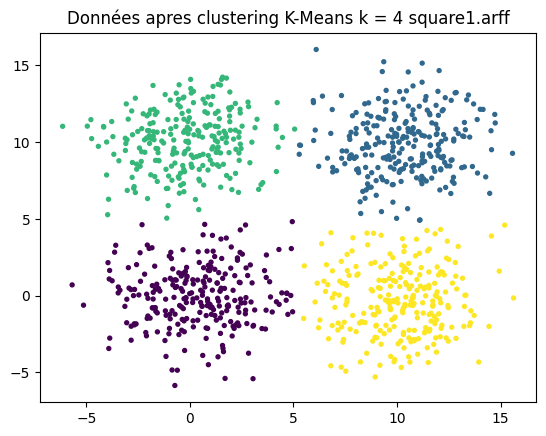

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
import time
from sklearn import cluster

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

print("Appel K-Means pour plusieurs valeurs de k, sans soucis")

names = ["twodiamonds.arff", "DS-577.arff", "square1.arff"]
best_ks = []

for name in names:

    path = "./artificial/"
    databrut = arff.loadarff(open(path + name,'r', encoding='utf-8'))
    datanp = [[x[0], x[1]] for x in databrut [0]]

    f0 = np.array(datanp)[:,0]
    f1 = np.array(datanp)[:,1]  

    best_score = 0

    for k in range(2, 9):

        tps1 = time.time()
        model = cluster.KMeans(n_clusters=k, init = 'k-means++')
        model.fit(datanp)
        tps2 = time.time()

        labels = model.labels_
        iteration = model.n_iter_
        
        sil_score = silhouette_score(datanp, model.fit_predict(datanp))
        davies_score = davies_bouldin_score(datanp, model.fit_predict(datanp))
        cal_score = calinski_harabasz_score(datanp, model.fit_predict(datanp))

        if sil_score > best_score:
            best_score = sil_score
            best_k = k
            
        print ("nb clusters = ", k, 
               ", \n\t sil_score = ", sil_score, 
               ", \n\t davies_score = ", davies_score, 
               ", \n\t cal_score = ", cal_score, 
               " , \n\t nb iter = ", iteration, 
               " , \n\t runtime = ", round (( tps2 - tps1 ) * 1000 , 2 )," ms " ) 

    best_ks.append(best_k)
    model = cluster.KMeans(n_clusters=best_k, init='k-means++')
    model.fit(datanp)
    labels = model.labels_

    plt.scatter( f0, f1, c=labels, s=8)
    plt.title("Données apres clustering K-Means k = " + str(best_k) + " " + name)
    plt.show ()

Nous avons dans cette partie étudié 3 jeux de données adaptées pour le K-Means et ce avec un `k` allant de 2 à 8 avec une selection du meilleur `k` pour les 3 :
- **twodiamond**
- **DS-577**
- **square1**

Pour chacun des jeux de données, le `k`choisi est celui qui, sans lancer l'algorithme, nous parait le plus logique. On remarquera que l'algorithme converge assez rapidement (au plus 25 itérations), ce qui rend cet algorithme plutôt rapide (exécution jamais au-dessus des 5 ms).

Pour ces 3 jeu de données le résultats obtenu avec le K-Means est très satisfaisant.

Appel KMeans pour plusieurs valeurs de k, avec soucis

nb clusters =  2 ,
	score =  0.3179557668446262 ,
	nb iter =  9 ,
	runtime =  2.08  ms 
nb clusters =  3 ,
	score =  0.34278067416208224 ,
	nb iter =  6 ,
	runtime =  3.08  ms 
nb clusters =  4 ,
	score =  0.3240198345287945 ,
	nb iter =  10 ,
	runtime =  2.97  ms 
nb clusters =  5 ,
	score =  0.3425509124527894 ,
	nb iter =  10 ,
	runtime =  2.84  ms 
nb clusters =  6 ,
	score =  0.3179961171327313 ,
	nb iter =  9 ,
	runtime =  2.28  ms 
nb clusters =  7 ,
	score =  0.34599860145422556 ,
	nb iter =  12 ,
	runtime =  2.46  ms 
nb clusters =  8 ,
	score =  0.3367835402021871 ,
	nb iter =  13 ,
	runtime =  2.96  ms 


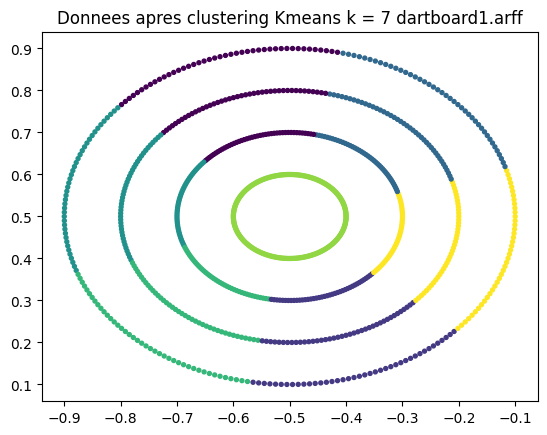

nb clusters =  2 ,
	score =  0.42937113058111165 ,
	nb iter =  6 ,
	runtime =  1.66  ms 
nb clusters =  3 ,
	score =  0.34955439482878803 ,
	nb iter =  10 ,
	runtime =  2.72  ms 
nb clusters =  4 ,
	score =  0.3462016953142985 ,
	nb iter =  7 ,
	runtime =  2.22  ms 
nb clusters =  5 ,
	score =  0.447003717034038 ,
	nb iter =  10 ,
	runtime =  2.54  ms 
nb clusters =  6 ,
	score =  0.46945741368478283 ,
	nb iter =  20 ,
	runtime =  3.7  ms 
nb clusters =  7 ,
	score =  0.48660098267486734 ,
	nb iter =  19 ,
	runtime =  3.44  ms 
nb clusters =  8 ,
	score =  0.4838312229630644 ,
	nb iter =  11 ,
	runtime =  2.73  ms 


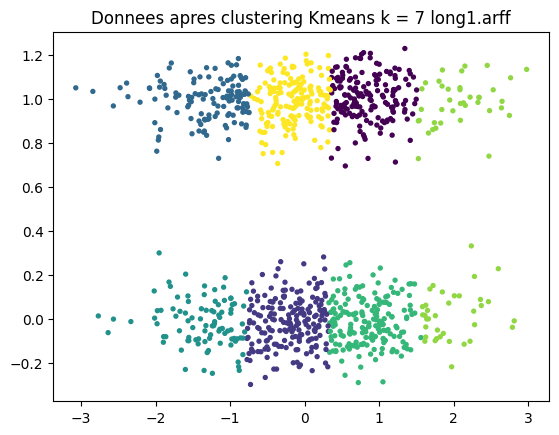

In [2]:
print("Appel KMeans pour plusieurs valeurs de k, avec soucis\n")

names = ["dartboard1.arff", "long1.arff"]
best_ks = []

for name in names:

    path = "./artificial/"
    databrut = arff.loadarff(open(path + name,'r', encoding='utf-8'))
    datanp = [[x[0], x[1]] for x in databrut [0]]

    f0 = np.array(datanp)[:,0]
    f1 = np.array(datanp)[:,1]  

    best_score = 0

    for k in range(2, 9):

        tps1 = time.time()
        model = cluster.KMeans(n_clusters=k, init = 'k-means++')
        model.fit(datanp)
        tps2 = time.time()

        labels = model.labels_
        iteration = model.n_iter_
        
        score = silhouette_score(datanp, model.fit_predict(datanp))

        if score > best_score:
            best_score = score
            best_k = k

        print ("nb clusters = ", k,
                ",\n\tscore = ", score,
                ",\n\tnb iter = ", iteration, 
                ",\n\truntime = ", round (( tps2 - tps1 ) * 1000 , 2 ) ," ms " ) 

    best_ks.append(best_k)
    model = cluster.KMeans(n_clusters=best_k, init='k-means++')
    model.fit(datanp)
    labels = model.labels_

    plt.scatter(f0, f1, c=labels, s=8)
    plt.title("Donnees apres clustering Kmeans k = " + str(best_k) + " " + name)
    plt.show()

Pareil qu'a la section précédente nous avons analysé les résultats avec un K-Means sur 2 jeu de données, cette fois ci plus problématique :
- **dartboard1 :** Les points de données forment des cercles, en regardant le choix apporté par l'algorithme (`k = 8`), il est évident que le choix n'est pas le bons puisque l'on observe 4 cercles distincts.
- **long1 :** Encore ici, le choix de `k = 8` ne parait pas bon, humainement on aperçois 2 nuages de points.

À travers ces 2 jeux de données, on observe très bien le problème du K-Means. Il est très sensible à la géométrie des données et suppose ses clusters comme étant sphériques (l'utilisation de la norme euclidienne est un problème, c.f. le 2nd exemple où le nuage de points est étiré).

En conclusion le K-Means est très efficace (en terme de prédiction et de temps d'entraînement) mais cela à un prix : celui de n'absoluement pas être flexible à la structure des données.

### Agglomerative

Le clustering agglomératif est une méthode faisant partie plus précisement du clustering hiérarchique. En effet, au début de l'algorithme chaque point est considéré comme étant seul dans son cluster, puis au fil du déroulement de l'algo, il est regroupé au sein d'autres clusters proches pour enfin avoir tous les points de la map faisant partie du même cluster. Ce clustering hiérarchique s'appuie sur différentes méthodes (qui vont impacter la façon dont sont fait ces regroupements) pour évaluer cette proximité, nous allons voir 4 d'entre eux quelle distance est utilisée pour faire la fusion de deux clusters :
- **single :** la distance la plus courte entre 2 points appartenant au 2 clusters.
- **average :** la distance moyenne entre toutes les paires de points des 2 clusters.
- **complete :** la distance la plus longue entre 2 points appartenant au 2 clusters (on prend une borne max).
- **ward :** celle qui permet minimiser la variance intra-cluster lors du regroupement.

Nous allons nous baser sur les dentogrammes, qui est une représentation visuelle des regroupements succesifs réalisé par le clustering agglomératif.

 Dendrogramme 'single' donnees initiales 


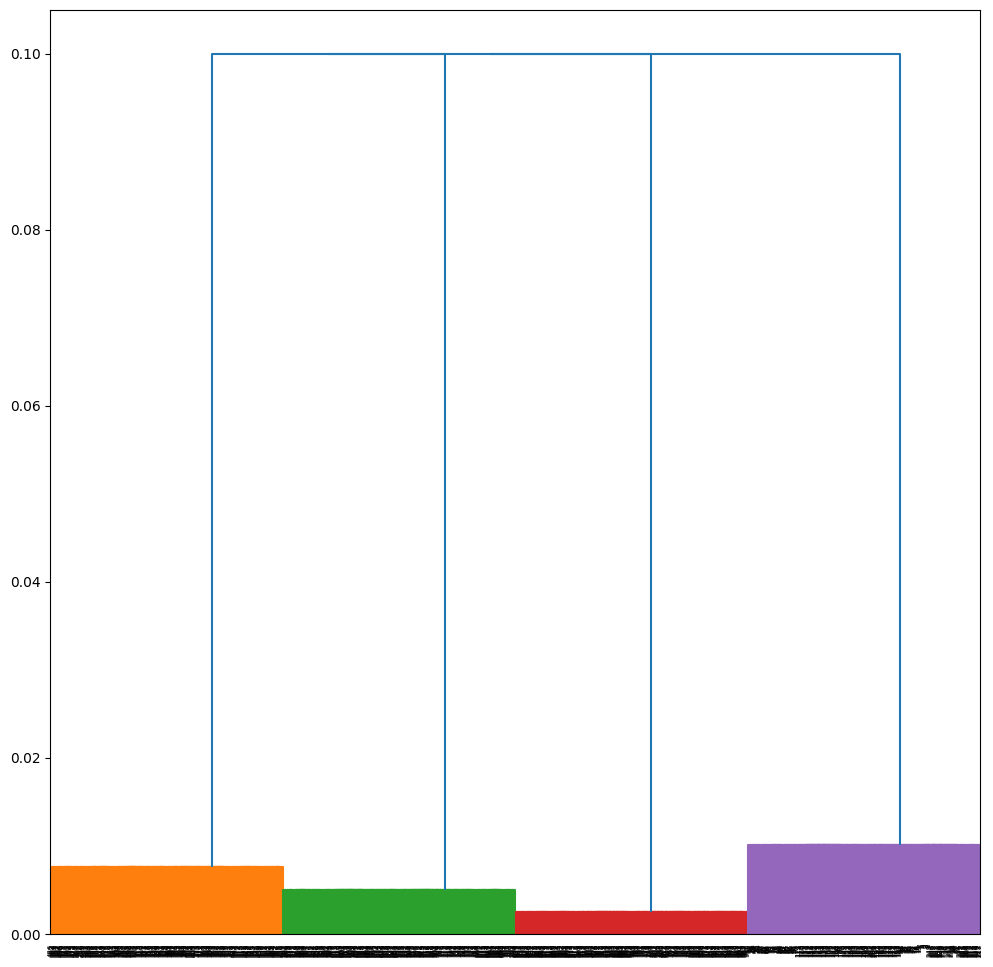

In [3]:
import scipy.cluster.hierarchy as shc

path = "./artificial/dartboard1.arff"
databrut = arff.loadarff(open(path,'r', encoding='utf-8'))
datanp = [[x[0], x[1]] for x in databrut [0]]

f0 = np.array(datanp)[:,0]
f1 = np.array(datanp)[:,1] 

print(" Dendrogramme 'single' donnees initiales ")
linked_mat = shc.linkage(datanp, 'single')
plt.figure(figsize=(12,12))
shc.dendrogram(linked_mat, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.show()

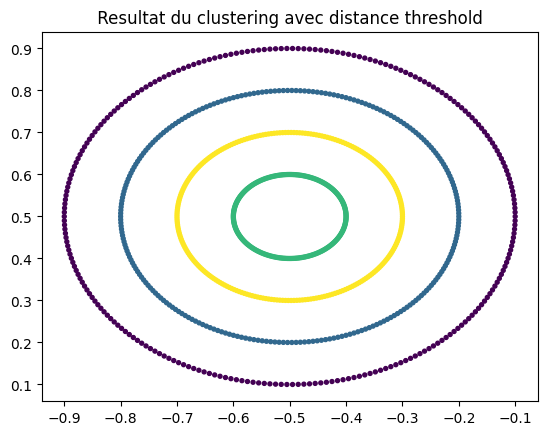

 nb clusters =  4 
	nb feuilles =  1000 
	runtime =  3.59  ms 


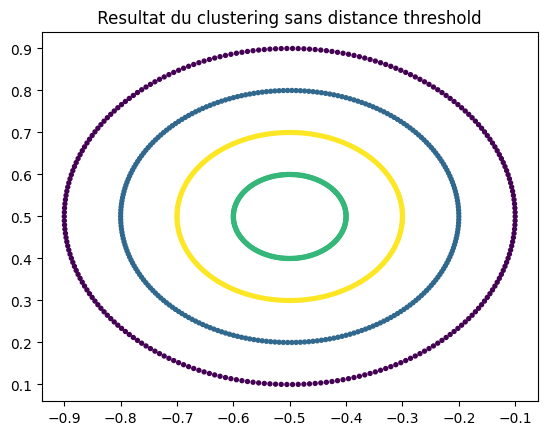

 nb clusters =  4 
	nb feuilles =  1000 
	runtime =  3.99  ms 


In [4]:
tps1 = time.time()
model = cluster.AgglomerativeClustering(distance_threshold=0.02, linkage='single', n_clusters=None)
model = model.fit(datanp)
tps2 = time.time()

labels = model.labels_
k = model.n_clusters_
leaves = model.n_leaves_

plt.scatter(f0, f1, c=labels, s=8)
plt.title(" Resultat du clustering avec distance threshold ")
plt.show()

print(" nb clusters = ", k, 
      "\n\tnb feuilles = ", leaves, 
      "\n\truntime = ", round((tps2 - tps1)*1000, 2), " ms ")

k = 4

tps1 = time.time()
model = cluster.AgglomerativeClustering(linkage='single', n_clusters=k)
model = model.fit(datanp)
tps2 = time.time()

labels = model.labels_
kres = model.n_clusters_
leaves = model.n_leaves_

plt.scatter(f0, f1, c=labels, s=8)
plt.title(" Resultat du clustering sans distance threshold ")
plt.show()

print(" nb clusters = ", k, 
      "\n\tnb feuilles = ", leaves, 
      "\n\truntime = ", round((tps2 - tps1)*1000, 2), " ms ")

À partir de cette exemple, nous montrons deux types de configuration possible pour l'entrainement avec le clustering agglomératif :
- Il est possible de sélectionner le seuil au delà duquel on considère que les clusters sont trop éloignés afin d'être regroupés. Ce seuil est peut être préalablement choisi à l'aide du dentogramme, ou d'une valeur que l'on considère satisfaisante pour préserver une similarité entre les clusters. Si on regarde celui de cet exemple, on voit bien que la largeur verticale entre le regroupement en 2 clusters et celui en 4 est considérable.
- Une autre possibilité est de choisir le nombre de cluster que l'on souhaite à la fin. Encore une fois le dentogramme (ou l'affichage des points sur la map) nous permet de voir le nombre de clusters qui permet d'avoir la largeur verticale minimale.

### Agglomerative

Du coup j'ai fait un truc pour automatiser pour trouver la threshold. Bon, pour les deux trucs qu'on a c'est pas ouf parce que c'est que single qui gagne mais en soit c'est normal je crois, faudrait trouver un autre jeu de données intéressant

Dataset: blobs.arff
 nb clusters = 2 
 nb feuilles = 300 
 combination = single 
 score = 1.0113612535573728 
 runtime = 0.81 ms



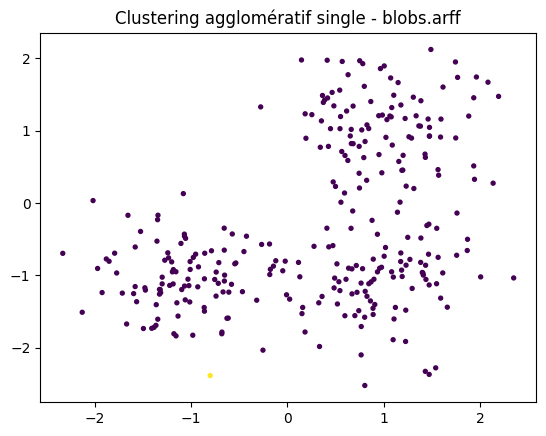

Dataset: blobs.arff
 nb clusters = 3 
 nb feuilles = 300 
 combination = complete 
 score = 1.0113612535573728 
 runtime = 0.99 ms



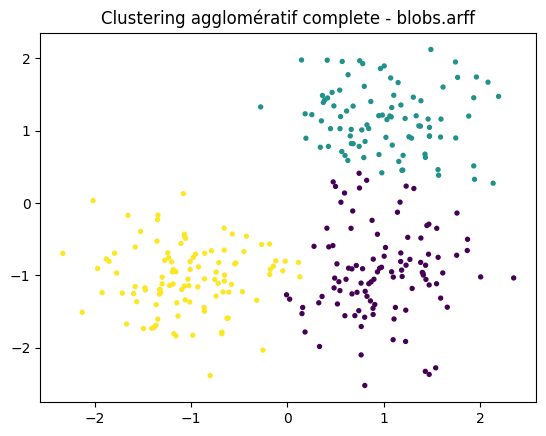

Dataset: blobs.arff
 nb clusters = 3 
 nb feuilles = 300 
 combination = average 
 score = 1.0113612535573728 
 runtime = 1.05 ms



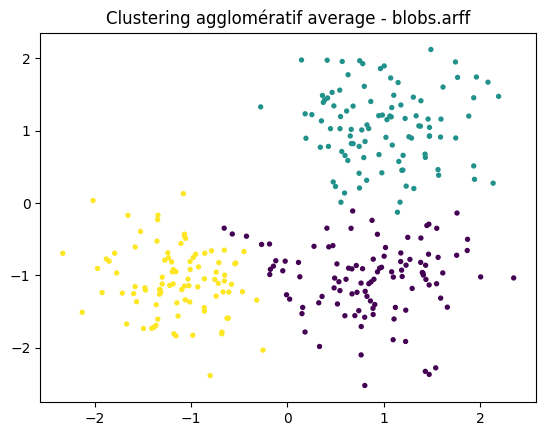

Dataset: blobs.arff
 nb clusters = 3 
 nb feuilles = 300 
 combination = ward 
 score = 1.0113612535573728 
 runtime = 1.15 ms



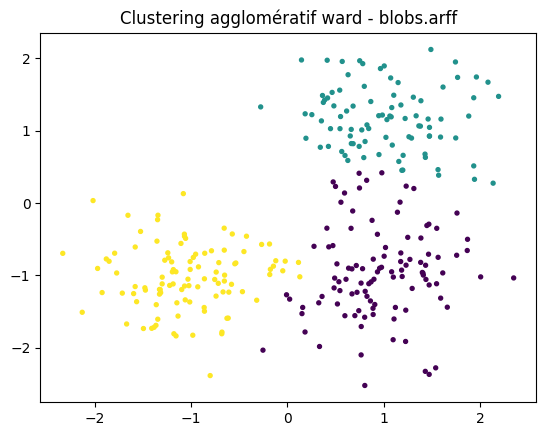

Dataset: long1.arff
 nb clusters = 2 
 nb feuilles = 1000 
 combination = single 
 score = 1.0113612535573728 
 runtime = 3.16 ms



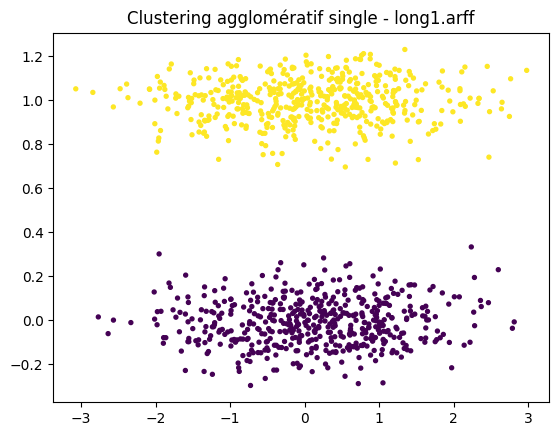

Dataset: long1.arff
 nb clusters = 2 
 nb feuilles = 1000 
 combination = complete 
 score = 1.0113612535573728 
 runtime = 5.62 ms



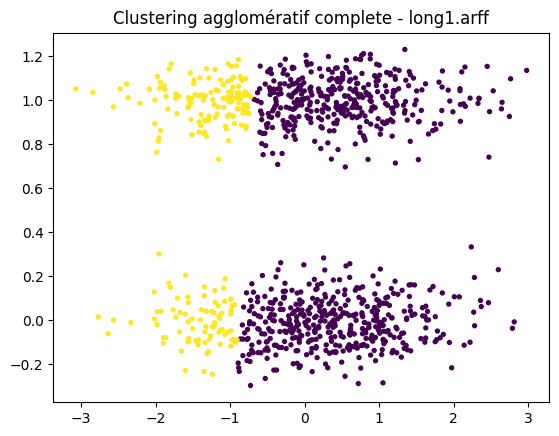

Dataset: long1.arff
 nb clusters = 2 
 nb feuilles = 1000 
 combination = average 
 score = 1.0113612535573728 
 runtime = 5.81 ms



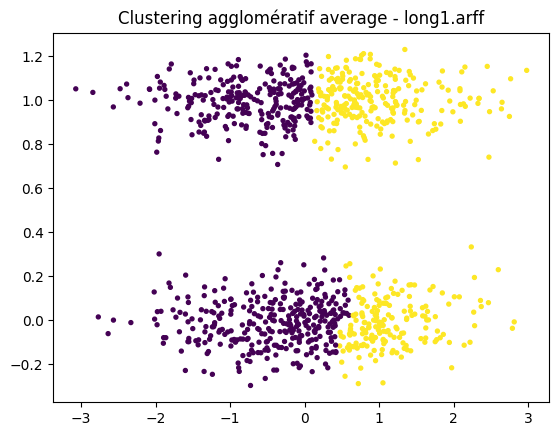

Dataset: long1.arff
 nb clusters = 2 
 nb feuilles = 1000 
 combination = ward 
 score = 1.0113612535573728 
 runtime = 6.35 ms



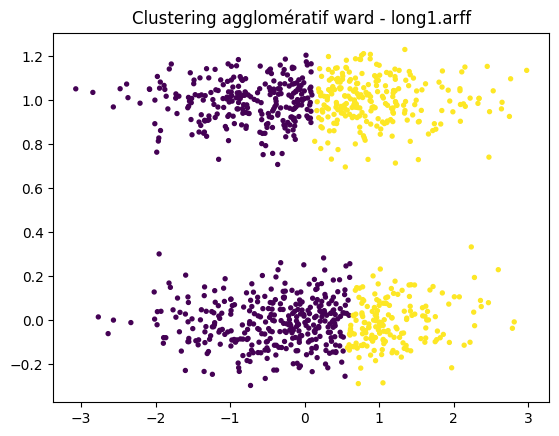

In [5]:
names = ["blobs.arff", "long1.arff"]
combinations = ['single', 'complete', 'average', 'ward']

for name in names:
    path = "./artificial/"
    databrut = arff.loadarff(open(path + name, 'r', encoding='utf-8'))
    datanp = np.array([[x[0], x[1]] for x in databrut[0]])

    f0 = np.array(datanp)[:,0]
    f1 = np.array(datanp)[:,1]
    best_score = 0

    for combination in combinations:
        linked_mat = shc.linkage(datanp, combination)
        distances = linked_mat[:, 2]
        diffs = np.diff(distances)
        threshold = distances[np.argmax(diffs)] + 1e-5

        tps1 = time.time()
        model = cluster.AgglomerativeClustering(distance_threshold=threshold, linkage=combination, n_clusters=None)
        model.fit(datanp)
        tps2 = time.time()

        labels = model.labels_
        score = silhouette_score(datanp, labels)

        if score > best_score:
            best_score = score

        print("Dataset: " + name)
        print(" nb clusters =", model.n_clusters_,
              "\n nb feuilles =", model.n_leaves_,
              "\n combination =", combination,
              "\n score =", davies_score,
              "\n runtime =", round((tps2 - tps1) * 1000, 2), "ms\n")

        plt.scatter(f0, f1, c=labels, s=8)
        plt.title("Clustering agglomératif " + combination + " - " + name)
        plt.show()

À travers ces 2 jeu de données, on met en lumière l'avantage de cette méthode de clustering :
- **blob :** Le meilleur réultat est obtenu avec *average* (bien que d'autres donnent de très bons résultats), les nuages de points sont convexes et de variances comparables, le moyennage fonctionne donc ici bien. De plus cette méthode est moins sensible aux outliers, or avec blob, on remarque sur la map qu'il y en a beacoup.
- **long1 :** Nous avions utilisé de jeu de données avec la méthode des K-Means, ce qui n'avait pas marché. Toutefois, ici avec le *single*, on a une démarcation bien meilleure qu'avec les autres. C'était prédictible car les deux nuages de points sont très éloignées et les points à l'intérieur sont très proche. En reliant donc progressivement les points les plus proches, *single* parvient à reconstituer correctement les deux clusters et ce malgré la forme allongé des nuages.

Dataset: target.arff
 nb clusters = 5 
 nb feuilles = 770 
 combination = single 
 score = 1.0113612535573728 
 runtime = 2.34 ms



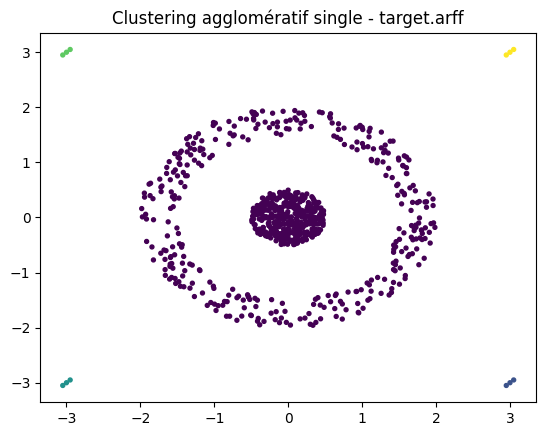

Dataset: target.arff
 nb clusters = 2 
 nb feuilles = 770 
 combination = complete 
 score = 1.0113612535573728 
 runtime = 3.58 ms



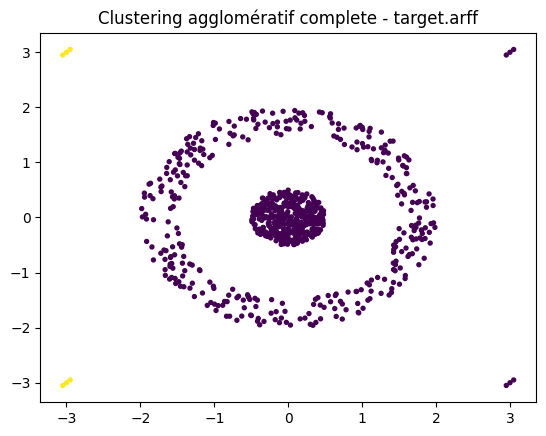

Dataset: target.arff
 nb clusters = 5 
 nb feuilles = 770 
 combination = average 
 score = 1.0113612535573728 
 runtime = 3.58 ms



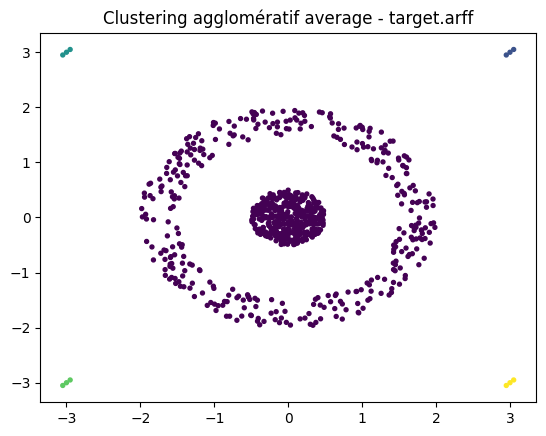

Dataset: target.arff
 nb clusters = 5 
 nb feuilles = 770 
 combination = ward 
 score = 1.0113612535573728 
 runtime = 3.82 ms



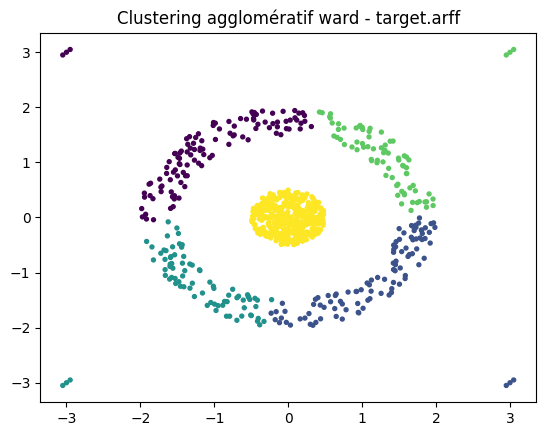

Dataset: chainlink.arff
 nb clusters = 2 
 nb feuilles = 1000 
 combination = single 
 score = 1.0113612535573728 
 runtime = 3.35 ms



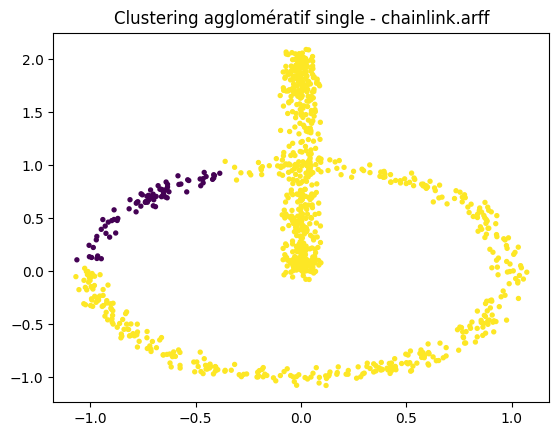

Dataset: chainlink.arff
 nb clusters = 2 
 nb feuilles = 1000 
 combination = complete 
 score = 1.0113612535573728 
 runtime = 5.72 ms



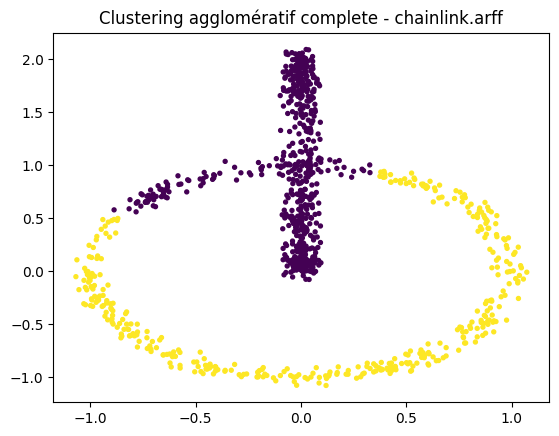

Dataset: chainlink.arff
 nb clusters = 2 
 nb feuilles = 1000 
 combination = average 
 score = 1.0113612535573728 
 runtime = 5.87 ms



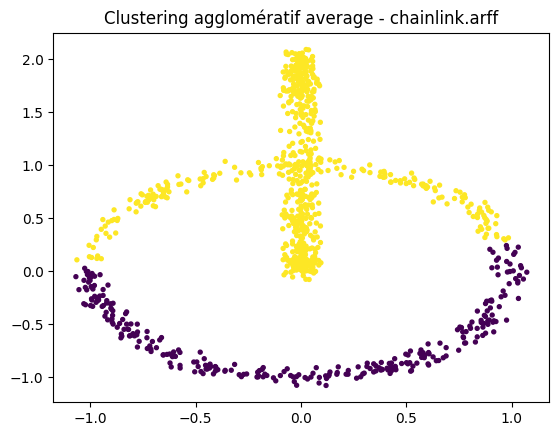

Dataset: chainlink.arff
 nb clusters = 2 
 nb feuilles = 1000 
 combination = ward 
 score = 1.0113612535573728 
 runtime = 6.33 ms



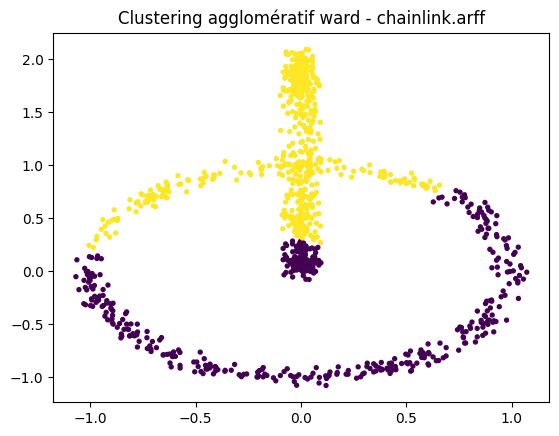

In [6]:
names = ["target.arff", "chainlink.arff"]
combinations = ['single', 'complete', 'average', 'ward']

for name in names:
    path = "./artificial/"
    databrut = arff.loadarff(open(path + name, 'r', encoding='utf-8'))
    datanp = np.array([[x[0], x[1]] for x in databrut[0]])

    f0 = np.array(datanp)[:,0]
    f1 = np.array(datanp)[:,1]
    best_score = 0

    for combination in combinations:
        linked_mat = shc.linkage(datanp, combination)
        distances = linked_mat[:, 2]
        diffs = np.diff(distances)
        threshold = distances[np.argmax(diffs)] + 1e-5

        tps1 = time.time()
        model = cluster.AgglomerativeClustering(distance_threshold=threshold, linkage=combination, n_clusters=None)
        model.fit(datanp)
        tps2 = time.time()

        labels = model.labels_
        score = silhouette_score(datanp, labels)

        if score > best_score:
            best_score = score

        print("Dataset: " + name)
        print(" nb clusters =", model.n_clusters_,
              "\n nb feuilles =", model.n_leaves_,
              "\n combination =", combination,
              "\n score =", davies_score,
              "\n runtime =", round((tps2 - tps1) * 1000, 2), "ms\n")

        plt.scatter(f0, f1, c=labels, s=8)
        plt.title("Clustering agglomératif " + combination + " - " + name)
        plt.show()

Avec ces 2 jeux de données, on met en évidence les limites du clustering agglomératif. Dans les deux cas c'est dû à la diversité des formes que l'on a (ici à base de formes concentriques). Avec en plus dans le premier exemple choisi (*target*) une densité très hétérogène (les points aux 4 angles).

Cette méthode permet toutefois des résultats plus probants qu'avec le K-Means (cf *long1*) grâce à la possibilité de choisir la façon dont on considère deux clusters proche l'un de l'autre et donc de s'adapter plus finement à la forme des nuages de données. Bien que ce paramètrage ne permet pas de tout arranger (comme on a pu le voir sur ces deux derniers exemples), c'est à dire quand les formes et densité sont trop exotiques.